In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_excel('results.xlsx', index_col='Name')
df

,N,AP,n_AP,GCC,s_GCC,t,layer 1 degree,layer 2 degree,layer 3 degree
Name,,,,,,,,,
Air_Train,69.0,12.0,0.173913,67.0,0.971014,4.0,5.22,9.33,NaN
Air_Train,69.0,3.0,0.043478,22.0,0.318841,4.0,5.22,9.33,NaN
Air_Train,69.0,4.0,0.057971,7.0,0.101449,4.0,5.22,9.33,NaN
Air_Train,69.0,0.0,0.000000,1.0,0.014493,4.0,5.22,9.33,NaN
arXiv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C. Elegans Connectomme,279.0,50.0,0.179211,226.0,0.810036,4.0,3.71,6.37,12.21
C. Elegans Connectomme,279.0,28.0,0.100358,119.0,0.426523,4.0,3.71,6.37,12.21
C. Elegans Connectomme,279.0,6.0,0.021505,16.0,0.057348,4.0,3.71,6.37,12.21
C. Elegans Connectomme,279.0,0.0,0.000000,2.0,0.007168,4.0,3.71,6.37,12.21


In [41]:
datasets_to_plot = [
    'Air_Train',
    'C. Elegans Connectomme',
    'Drosophila Melanogaster',
    'Human Brain',
    'Physicians',
    'Rattus',
]

In [51]:
n_gcc_final = []
n_ap = []
for dataset in df.index.unique():
    if dataset in datasets_to_plot:
        sgcc = df.loc[dataset, 's_GCC']
        n_gcc_final.append(sgcc.iloc[-1] if hasattr(sgcc, 'iloc') else sgcc)
        nap = df.loc[dataset, 'n_AP']
        n_ap.append(nap.iloc[0] if hasattr(nap, 'iloc') else nap)

In [52]:
plt.rc('text', usetex=True)
plt.rc('font', size=22, **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['savefig.bbox'] = 'tight'

In [56]:
fmts = ['o', 's', '^', 'x', 'v', 'P', '*']

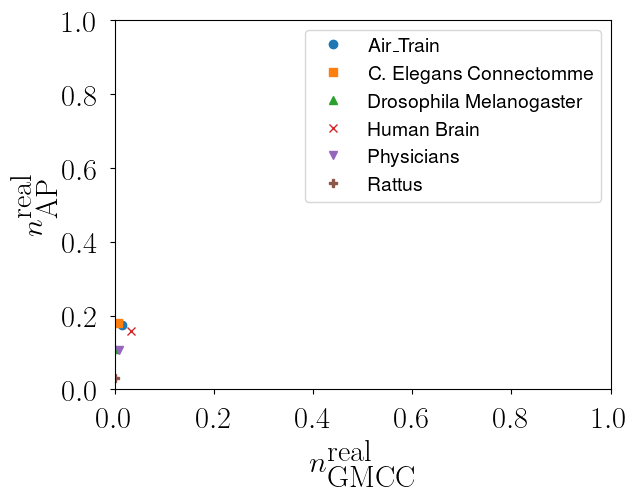

In [59]:
for x, y, fmt, lbl in zip(
    n_gcc_final,
    n_ap,
    fmts[:len(datasets_to_plot)],
    datasets_to_plot,
):
    plt.plot(x, y, fmt, label=lbl)

plt.xlabel(r'$n_{\textrm{GMCC}}^{\textrm{real}}$')
plt.ylabel(r'$n_{\textrm{AP}}^{\textrm{real}}$')

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.legend(prop={'size': 14})

plt.savefig('AP_vs_GCC.png')
plt.savefig('AP_vs_GCC.pdf')